<a href="https://colab.research.google.com/github/miftaadiwira16/Loan-Interest-Rate-Prediction-Using-Python/blob/main/Loan_interest_rate_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loan Interest Rate Prediction

### Created by Mifta Adiwira Jati Jaka

### Dataset story

Have you ever wondered how lenders use various factors such as credit score, annual income, the loan amount approved, tenure, debt-to-income ratio etc. and select your interest rates?

The process, defined as ‘risk-based pricing’, uses a sophisticated algorithm that leverages different determining factors of a loan applicant. Selection of significant factors will help develop a prediction algorithm which can estimate loan interest rates based on clients’ information. On one hand, knowing the factors will help consumers and borrowers to increase their credit worthiness and place themselves in a better position to negotiate for getting a lower interest rate. On the other hand, this will help lending companies to get an immediate fixed interest rate estimation based on clients information. Here, your goal is to use a training dataset to predict the loan rate category (1 / 2 / 3) that will be assigned to each loan in our test set.

### Table Column Overview

- Loan_ID:	A unique id for the loan.
- Loan_Amount_Requested: The listed amount of the loan applied for by the borrower.
- Length_Employed:	Employment length in years.
- Home_Owner: The home ownership status provided by the borrower during registration. Values are: Rent, Own, Mortgage, Other.
- Annual_Income: The annual income provided by the borrower during registration.
- Income_Verified: Indicates if income was verified, not verified, or if the income source was verified.
- Purpose_Of_Loan: A category provided by the borrower for the loan request. 
- Debt_To_Income: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested loan, divided by the borrower’s self-reported monthly income.
- Inquiries_Last_6Mo:	The number of inquiries by creditors during the past 6 months.
- Months_Since_Deliquency: The number of months since the borrower's last delinquency.
- Number_Open_Accounts: The number of open credit lines in the borrower's credit file.
- Total_Accounts: The total number of credit lines currently in the borrower's credit file.
- Gender: Gender.
- Interest_Rate: Target Variable: Interest Rate category (1/2/3) of the loan application.


In [ ]:
!pip install datasist
!pip install --upgrade pandas
!pip install --upgrade numpy
!pip install --upgrade scipy
!pip install --upgrade scikit-learn
!pip install matplotlib==3.4
!pip install --upgrade seaborn
!pip install inflection
!pip install xgboost
!pip install lightgbm
!pip install catboost

## Import Library

In [134]:
#Import library
import pandas as pd
import numpy as np
import datasist as ds

#Import visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#import model
import catboost as cb
import xgboost as xgb
import lightgbm as lgbm

#import sklearn
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from imblearn.metrics import sensitivity_specificity_support
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import inflection
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier

## Load dataset

In [135]:
loan_df = pd.read_csv('https://raw.githubusercontent.com/miftaadiwira16/datasets/main/Train.csv')
loan_df.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [136]:
loan_df.tail()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
164304,10164305,"20,725",10+ years,Rent,NaN,VERIFIED - income source,credit_card,13.56,0,NaN,13,16,Male,2
164305,10164306,"6,000",8 years,Own,NaN,VERIFIED - income source,small_business,9.12,0,36.0,13,30,Male,2
164306,10164307,"20,250",10+ years,Mortgage,NaN,VERIFIED - income,credit_card,18.17,1,NaN,17,30,Male,1
164307,10164308,"10,000",4 years,Rent,NaN,not verified,major_purchase,18.75,1,48.0,16,62,Female,3
164308,10164309,"9,250",10+ years,Rent,NaN,VERIFIED - income,credit_card,19.44,1,NaN,5,9,Female,2


From this information above, we know this dataset have 164308 data.

## Exploratory Data Analysis

In [137]:
loan_df.isnull().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
dtype: int64

In [138]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          156938 non-null  object 
 3   Home_Owner               138960 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

It appears there's column (Loan_Amount_Requested) that has to be numerical but it's considered as categorical. So, I decide to change the datatype into numerical.

In [139]:
loan_df['Loan_Amount_Requested'] = loan_df['Loan_Amount_Requested'].str.replace(',','')
loan_df['Loan_Amount_Requested'] = pd.to_numeric(loan_df['Loan_Amount_Requested'], errors='coerce')

In [140]:
#exclude the unnamed variable
df = loan_df

#show null values and its percentage
null_val = pd.DataFrame(df.dtypes).T.rename(index = {0:'Columns Type'})
null_val = null_val.append(pd.DataFrame(df.isnull().sum()).T.rename(index = {0:'Amount of Null Values'}))
null_val = null_val.append(pd.DataFrame(round(df.isnull().sum()/df.shape[0]*100,2)).T.rename(index = {0:'Percentage of Null Values'}))
null_val

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
Columns Type,int64,int64,object,object,float64,object,object,float64,int64,float64,int64,int64,object,int64
Amount of Null Values,0,0,7371,25349,25102,0,0,0,0,88379,0,0,0,0
Percentage of Null Values,0.0,0.0,4.49,15.43,15.28,0.0,0.0,0.0,0.0,53.79,0.0,0.0,0.0,0.0


There are 4% missing/null values in Length_Employed, 15% missing/null values in Home_Owner, 15% missing/null values in Annual_Income, 53% missing/null values in Months_since_Deliquency. 

## Data Cleansing

### Imputation categorical & numerical variable

There are 2 columns (Length_Employed, Home_Owner) with categorical variable and 2 columns with numerical variable (Annual_Income, Months_Since_Deliquency) that have null values. I decide to fill the null values with feature engineering - imputation categorical & numerical variable.
  - Mode (most frequent) for categorical variable.
  - Mean for numerical variable.

In [141]:
#impute the missing values
#categorical variable + binary variable
cat_var = ['Length_Employed', 'Home_Owner']
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for i in cat_var:
  mean_imputer = mean_imputer.fit(df[[i]])
  df[i] = mean_imputer.transform(df[[i]]).ravel()

#numerical variable
num_var = ['Annual_Income', 'Months_Since_Deliquency']
mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
for i in num_var:
  mean_imputer = mean_imputer.fit(df[[i]])
  df[i] = mean_imputer.transform(df[[i]]).ravel()

df.isnull().sum()

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
Interest_Rate              0
dtype: int64

In [142]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan_ID,164309.0,1.008216e+07,47432.067027,10000001.0,10041078.00,1.008216e+07,1.012323e+07,10164309.00
Loan_Amount_Requested,164309.0,1.434934e+04,8281.868700,500.0,8000.00,1.207500e+04,2.000000e+04,35000.00
Annual_Income,164309.0,7.333116e+04,55574.394150,4000.0,48600.00,7.000000e+04,8.200000e+04,7500000.00
Debt_To_Income,164309.0,1.720719e+01,7.845083,0.0,11.37,1.684000e+01,2.278000e+01,39.99
Inquiries_Last_6Mo,164309.0,7.816979e-01,1.034747,0.0,0.00,0.000000e+00,1.000000e+00,8.00
Months_Since_Deliquency,164309.0,3.422936e+01,14.793023,0.0,34.00,3.422936e+01,3.422936e+01,180.00
Number_Open_Accounts,164309.0,1.119382e+01,4.991813,0.0,8.00,1.000000e+01,1.400000e+01,76.00
Total_Accounts,164309.0,2.506767e+01,11.583067,2.0,17.00,2.300000e+01,3.200000e+01,156.00
Interest_Rate,164309.0,2.158951e+00,0.738364,1.0,2.00,2.000000e+00,3.000000e+00,3.00


Summary of statistic numerical column.

## Data Visualization

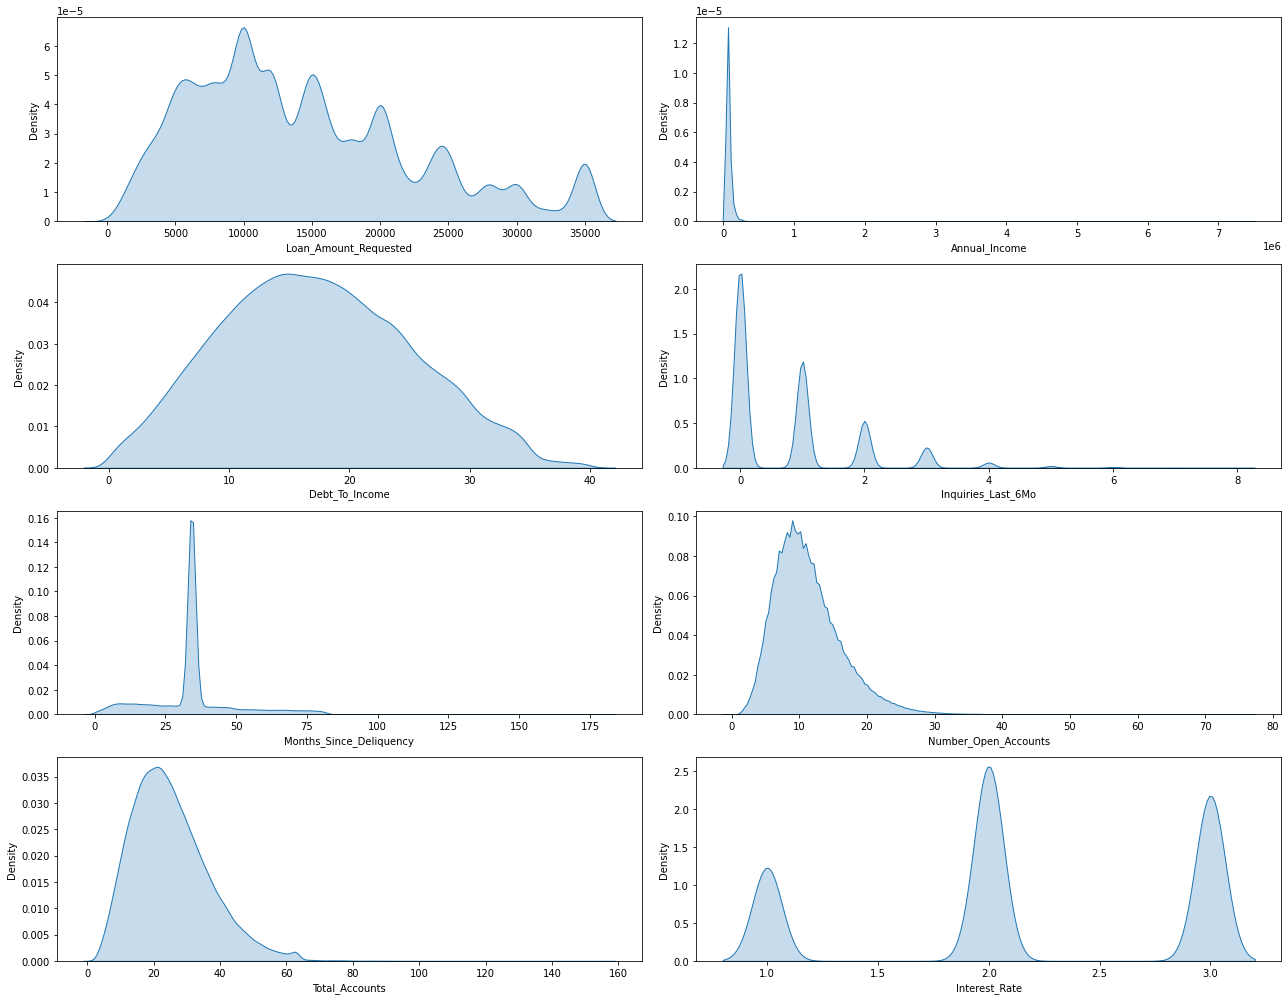

In [143]:
num_cols = ['Loan_Amount_Requested','Annual_Income','Debt_To_Income','Inquiries_Last_6Mo','Months_Since_Deliquency','Number_Open_Accounts','Total_Accounts','Interest_Rate']
fig, axes = plt.subplots(4,2, figsize=(18,14))
axes = [ax for axes_row in axes for ax in axes_row]

for i, col in enumerate(num_cols):
  plot = sns.kdeplot(data=df, x=col, ax=axes[i], fill=True)
plt.tight_layout()

- In terms of Loan Amount Requested: the applicant mostly request loan in around 8000 until 20000.
- In terms of Annual Income: the applicant mostly earn income in a year between 48000 until 82000.
- In terms of Debt to income: the applicant mostly have 10 until 23 debt to income.
- In terms of Inquires Last 6 months: the applicant has inquired by creditors for the past 6 months is 0 until 2
- In terms of Months since deliquency: the applicant mostly have 28 until 37 months since deliquency.
- In terms of Number open accounts: the applicant mostly have 8 - 14 open accounts.
- In terms of Total accounts: the applicant mostly have 17 until 32 accounts.
- In terms of Interest rate: the applicant mostly has second rate of interest for the loan.

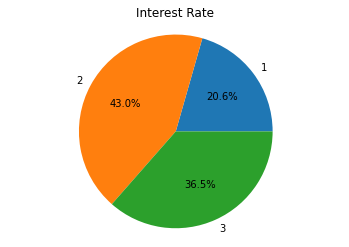

In [144]:
interest_rate_data = df.groupby(['Interest_Rate']).size()

my_labels = '1','2','3'
plt.pie(interest_rate_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Interest Rate')
plt.axis('equal')
plt.show()

From this information above, we know the applicant that has second rate of interest fill the highest total of applicant that want to loan is around 43%. And the following of interest rate, the applicant has third rate of interest to loan is around 36.5%. The applicant has first rate of interest to loan is around 20.6%. The applicant prefer the second rate because the loan amount is as the applicant needs and the interest paid is not too high.

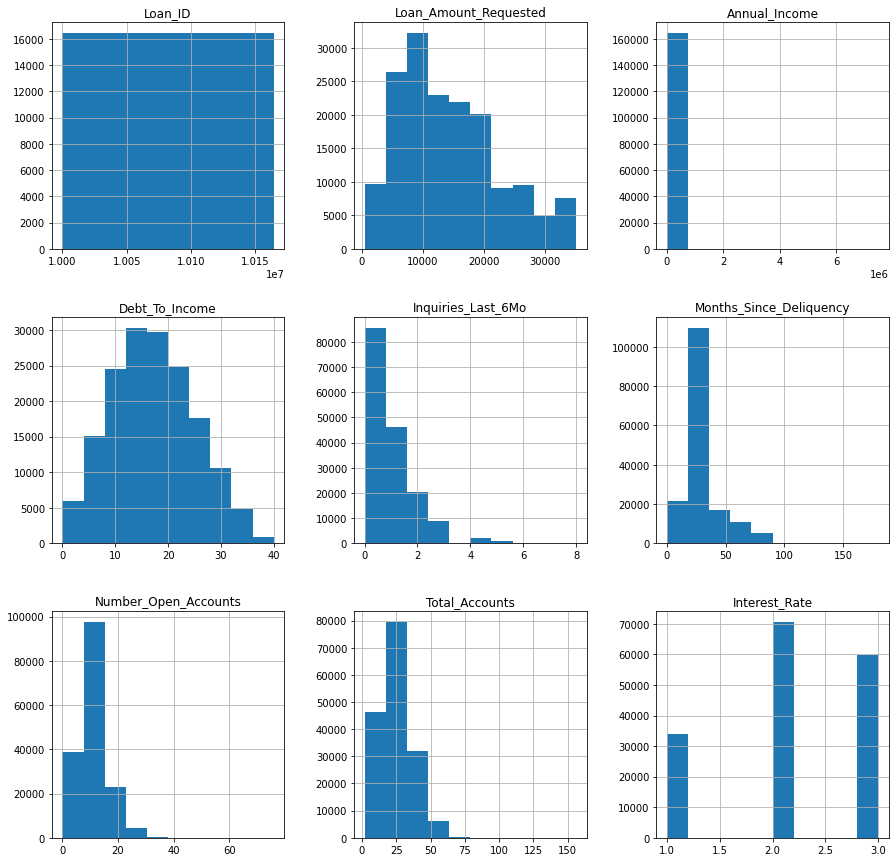

In [145]:
# check histogram for continuous columns
df.hist(figsize=(15,15))
plt.show()

Data distribution of numerical variable.

In [146]:
cats = [col for col in df.columns if (df[col].dtype == 'object') & (col not in ['Loan_ID'])]
nums = [col for col in df.columns if (df[col].dtype != 'object') & (col not in ['Loan_ID'])]

Length_Employed


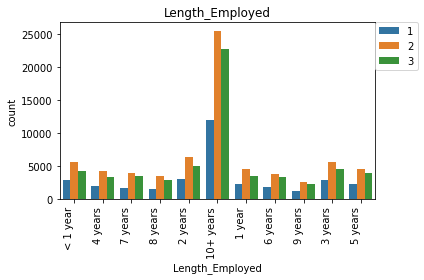

Home_Owner


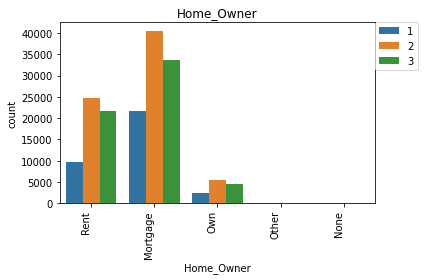

Income_Verified


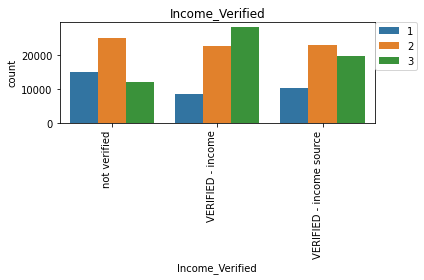

Purpose_Of_Loan


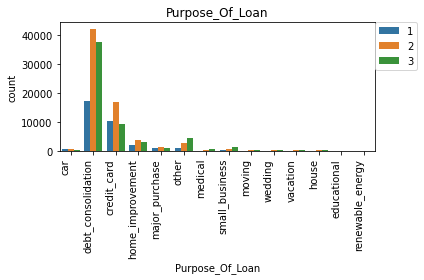

Gender


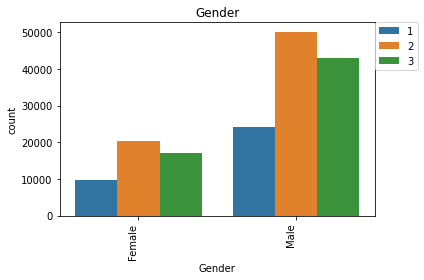

In [147]:
for col in cats:
    print(col)
    ax = sns.countplot(data=df, x=col, hue='Interest_Rate')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    plt.title(col)
    plt.tight_layout()
    plt.show()

- In terms of Length Employed with loan interest rate: the applicant that has more than 10 years work as employee have the highest total of applicant with more than 10000 applicants, because they have settled their financial so they can manage their financial plan. The applicant has less than 10 years work as employee has average total of applicant with approximately 0 - 5000 applicants. either 10 years employee or less than 10 years employee, the average applicant prefer the second rate of interest.

- In terms of Home owner with loan interest rate: the applicant that mortgage their residence has the highest total of people that interest want to loan. It's because they pay their residence with long-term installments and the second rate of interest is still the highest

- In terms of Income verified with loan interest rate: The total of applicant with the status income not verified, verified - income and verified - income source still has not too many differences of total applicant. because the system or PIC that has responsible in verification still investigate the status income another applicant.

- In terms of Purpose of loan with loan interest rate: most of applicant has purpose of loan in debt consolidation. Because most of applicant thinks they want to streamlines their financial which combining multiple outstanding debt into a single loan and interest rates they have to worry about.

- In terms of Gender with loan interest rate: mostly the applicant is a male gender. Because the average in a household that has a permanent job and who is in charge of pay the loan payment is a male.

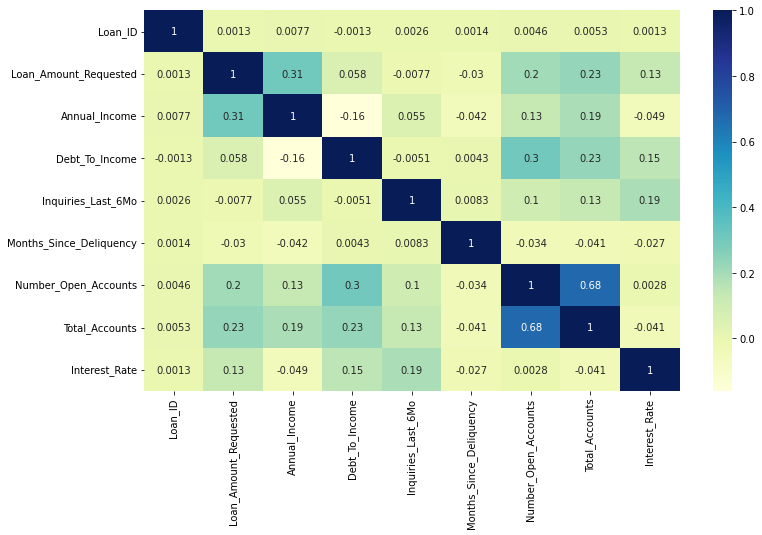

In [148]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

there is high correlation around 68% between the total account and the number of open accounts, because total account column explain the applicant has total existing credit lines and number open account column explain how many the applicant still can open credit lines from total account existing from the applicant.

## Data Preprocessing

### Train - Test Split

In [149]:
df_X = df.drop(columns=['Loan_ID','Interest_Rate'])
df_y = df['Interest_Rate']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, 
                                                    test_size=0.3, 
                                                    random_state=1, 
                                                    stratify=df_y)

train-test split first to prevent data leakage when doing the data preprocessing steps.

### Label Encoding

In [150]:
le = LabelEncoder()

le.fit(y_train)

y_train_encode = le.transform(y_train)
y_test_encode = le.transform(y_test)

In [151]:
le.classes_

array([1, 2, 3])

### One Hot Encoding

In [152]:
column_numerical = df_X.select_dtypes(include=np.number).columns.values.tolist()
column_categorical = df_X.select_dtypes(exclude=np.number).columns.values.tolist()

In [153]:
# ‘if_binary’ : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.
ohe = OneHotEncoder(sparse=False, drop='if_binary')

ohe.fit(X_train[column_categorical])

X_train_ohe = ohe.transform(X_train[column_categorical])
X_test_ohe = ohe.transform(X_test[column_categorical])

### Encoded Dataframe

Combine the encoded features and the numerical features. Make sure that the index is the same.

In [154]:
column_ohe = ohe.get_feature_names_out()
column_ohe

array(['Length_Employed_1 year', 'Length_Employed_10+ years',
       'Length_Employed_2 years', 'Length_Employed_3 years',
       'Length_Employed_4 years', 'Length_Employed_5 years',
       'Length_Employed_6 years', 'Length_Employed_7 years',
       'Length_Employed_8 years', 'Length_Employed_9 years',
       'Length_Employed_< 1 year', 'Home_Owner_Mortgage',
       'Home_Owner_None', 'Home_Owner_Other', 'Home_Owner_Own',
       'Home_Owner_Rent', 'Income_Verified_VERIFIED - income',
       'Income_Verified_VERIFIED - income source',
       'Income_Verified_not verified', 'Purpose_Of_Loan_car',
       'Purpose_Of_Loan_credit_card',
       'Purpose_Of_Loan_debt_consolidation',
       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement',
       'Purpose_Of_Loan_house', 'Purpose_Of_Loan_major_purchase',
       'Purpose_Of_Loan_medical', 'Purpose_Of_Loan_moving',
       'Purpose_Of_Loan_other', 'Purpose_Of_Loan_renewable_energy',
       'Purpose_Of_Loan_small_business', 'Pur

Rename the column name to snake_case format.

In [155]:
for i, col in enumerate(column_ohe):
  column_ohe[i] = inflection.underscore(column_ohe[i])
  column_ohe[i] = column_ohe[i].replace(' ', '_')
  column_ohe[i] = column_ohe[i].replace('<', 'less_than')
  column_ohe[i] = column_ohe[i].replace('>', 'greater_than')

column_ohe

array(['length_employed_1_year', 'length_employed_10+_years',
       'length_employed_2_years', 'length_employed_3_years',
       'length_employed_4_years', 'length_employed_5_years',
       'length_employed_6_years', 'length_employed_7_years',
       'length_employed_8_years', 'length_employed_9_years',
       'length_employed_less_than_1_year', 'home_owner_mortgage',
       'home_owner_none', 'home_owner_other', 'home_owner_own',
       'home_owner_rent', 'income_verified_verified___income',
       'income_verified_verified___income_source',
       'income_verified_not_verified', 'purpose_of_loan_car',
       'purpose_of_loan_credit_card',
       'purpose_of_loan_debt_consolidation',
       'purpose_of_loan_educational', 'purpose_of_loan_home_improvement',
       'purpose_of_loan_house', 'purpose_of_loan_major_purchase',
       'purpose_of_loan_medical', 'purpose_of_loan_moving',
       'purpose_of_loan_other', 'purpose_of_loan_renewable_energy',
       'purpose_of_loan_small_busines

### Train Set

In [156]:
# create dataframe from one-hot encoded features
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=column_ohe, index=X_train.index)

# combine the numerical and encoded features
X_train_encode = pd.concat([X_train.drop(columns=column_categorical), X_train_ohe_df], axis=1)
X_train_encode.head()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,length_employed_1_year,length_employed_10+_years,length_employed_2_years,...,purpose_of_loan_house,purpose_of_loan_major_purchase,purpose_of_loan_medical,purpose_of_loan_moving,purpose_of_loan_other,purpose_of_loan_renewable_energy,purpose_of_loan_small_business,purpose_of_loan_vacation,purpose_of_loan_wedding,gender_male
89886,10050,73331.159434,28.47,0,34.229356,7,15,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90538,15000,42500.000000,22.25,0,15.000000,12,25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32854,5875,30000.000000,27.56,1,34.229356,11,13,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
116057,6000,380000.000000,8.94,1,47.000000,13,34,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
61991,15000,49000.000000,16.39,1,34.229356,8,14,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Test Set

In [157]:
# create dataframe from one-hot encoded features
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=column_ohe, index=X_test.index)

# combine the numerical and encoded features
X_test_encode = pd.concat([X_test.drop(columns=column_categorical), X_test_ohe_df], axis=1)
X_test_encode.head()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,length_employed_1_year,length_employed_10+_years,length_employed_2_years,...,purpose_of_loan_house,purpose_of_loan_major_purchase,purpose_of_loan_medical,purpose_of_loan_moving,purpose_of_loan_other,purpose_of_loan_renewable_energy,purpose_of_loan_small_business,purpose_of_loan_vacation,purpose_of_loan_wedding,gender_male
12829,5000,60000.0,11.81,1,0.000000,11,34,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
66004,5000,64000.0,24.49,0,34.229356,11,34,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
52565,19400,135000.0,15.96,0,5.000000,11,26,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
153795,17500,60500.0,29.63,1,34.229356,22,40,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11403,10000,42000.0,7.46,0,34.229356,6,17,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Full Dataset

In [158]:
# combine the X-train and X-test
df_encode = pd.concat([X_train_encode, X_test_encode], axis=0)

# combine with the y-train
df_encode = df_encode.join(pd.Series(y_train_encode, name='Interest_Rate', index=X_train_encode.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
df_encode = df_encode.join(pd.Series(y_test_encode, name='Interest_Rate', index=X_test_encode.index), lsuffix='_1', rsuffix='_2')

# merging the y-train and y-test column
df_encode['Interest_Rate_1'].fillna(df_encode['Interest_Rate_2'], inplace=True)
df_encode.drop(columns='Interest_Rate_2', inplace=True)
df_encode.rename(columns={'Interest_Rate_1':'Interest_Rate'}, inplace=True)

df_encode.head()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,length_employed_1_year,length_employed_10+_years,length_employed_2_years,...,purpose_of_loan_major_purchase,purpose_of_loan_medical,purpose_of_loan_moving,purpose_of_loan_other,purpose_of_loan_renewable_energy,purpose_of_loan_small_business,purpose_of_loan_vacation,purpose_of_loan_wedding,gender_male,Interest_Rate
89886,10050,73331.159434,28.47,0,34.229356,7,15,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
90538,15000,42500.000000,22.25,0,15.000000,12,25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
32854,5875,30000.000000,27.56,1,34.229356,11,13,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
116057,6000,380000.000000,8.94,1,47.000000,13,34,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
61991,15000,49000.000000,16.39,1,34.229356,8,14,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0


In [159]:
df_encode_train = pd.concat([X_train_encode, 
                               pd.Series(y_train_encode, name='Interest_Rate', index=X_train_encode.index)], 
                              axis=1)
df_encode_train.head()

,Loan_Amount_Requested,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,length_employed_1_year,length_employed_10+_years,length_employed_2_years,...,purpose_of_loan_major_purchase,purpose_of_loan_medical,purpose_of_loan_moving,purpose_of_loan_other,purpose_of_loan_renewable_energy,purpose_of_loan_small_business,purpose_of_loan_vacation,purpose_of_loan_wedding,gender_male,Interest_Rate
89886,10050,73331.159434,28.47,0,34.229356,7,15,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
90538,15000,42500.000000,22.25,0,15.000000,12,25,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
32854,5875,30000.000000,27.56,1,34.229356,11,13,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
116057,6000,380000.000000,8.94,1,47.000000,13,34,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
61991,15000,49000.000000,16.39,1,34.229356,8,14,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2


### Oversampling with SMOTE

This dataset is imbalanced. To get this dataset balanced, I decide to use SMOTE, one of the oversampling methods.

Note: Oversampling should only be performed on the train set.

In [160]:
smote = SMOTE(random_state=1)

X_train_smote, y_train_smote = smote.fit_resample(X_train_encode, y_train_encode)

X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train_smote.columns)
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['Interest_Rate'])

df_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

In [161]:
df_encode_train['Interest_Rate'].value_counts()

1    49406
2    41946
0    23664
Name: Interest_Rate, dtype: int64

In [162]:
df_smote['Interest_Rate'].value_counts()

1    49406
2    49406
0    49406
Name: Interest_Rate, dtype: int64

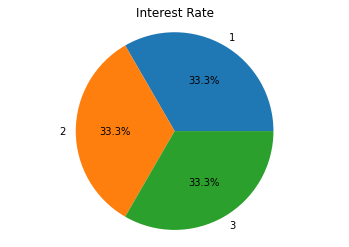

In [163]:
interest_rate_df_smote = df_smote.groupby(['Interest_Rate']).size()

my_labels = '1','2','3'
plt.pie(interest_rate_df_smote,labels=my_labels,autopct='%1.1f%%')
plt.title('Interest Rate')
plt.axis('equal')
plt.show()

## Model Development

Use 3 ML algorithm:
  - Catboost
  - XGBoost
  - LightGBM


In [164]:
model_list = {
    'CatBoost':CatBoostClassifier(random_state=1, verbose=False),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_encode.copy()
y_test_model = y_test_encode.copy()

In [165]:
model_list['CatBoost'].fit(X_train_model, y_train_model)
y_pred = model_list['CatBoost'].predict(X_test_model)

print(classification_report(y_test_model, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.511     0.307     0.383     10142
           1      0.509     0.615     0.557     21174
           2      0.599     0.588     0.593     17977

    accuracy                          0.542     49293
   macro avg      0.540     0.503     0.511     49293
weighted avg      0.542     0.542     0.535     49293



In [166]:
model_list['XGBoost'].fit(X_train_model, y_train_model)
y_pred = model_list['XGBoost'].predict(X_test_model)

print(classification_report(y_test_model, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.495     0.249     0.331     10142
           1      0.495     0.622     0.551     21174
           2      0.578     0.565     0.572     17977

    accuracy                          0.525     49293
   macro avg      0.523     0.479     0.485     49293
weighted avg      0.525     0.525     0.514     49293



In [167]:
model_list['LightGBM'].fit(X_train_model, y_train_model)
y_pred = model_list['LightGBM'].predict(X_test_model)

print(classification_report(y_test_model, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.518     0.278     0.362     10142
           1      0.504     0.620     0.556     21174
           2      0.591     0.584     0.588     17977

    accuracy                          0.537     49293
   macro avg      0.538     0.494     0.502     49293
weighted avg      0.538     0.537     0.528     49293



Use all variants of gradient boosting algorithms in scope (CatBoost, XGBoost, and LightGBM). Gradient boosting algorithms can be a Regressor (predicting continuous target variables) or a Classifier (predicting categorical target variables). 

These models shows accuracy in around 52% - 54%. It's not good enough performance ML model because the accuracy is still less than 70%.

It happens because the correlation between each features with target class is low. And probably do some feature engineering furthermore.

## Conclusion & Recommendation:
- From the accuracy ML model, we still know the ML model that I build is not recommended to implement, because it shows low accuracy in around 52% - 54%. Yet, My hypothesis is this dataset is still not usable to implement machine learning models, because it seen from the correlation between each features and the target class is still low. My recommendation is do some another feature engineering that can make accuracy higher.

- Target more on the customer who has source of income has been verified with the employee's length of service is 10 years and above, because employees with more than 10 years of work have more stable income and have long-term savings.

- Give interest discounts to customers that mortgage their home-owner status to trigger them to take long-term loans.

- Since the loan purpose of most customers is debt consolidation, we can consider giving them a discounted interest and long-term installment for them to choose a loan at our bank.
